# **ANALISIS DESCRIPTIVO PROYECTO INTEGRADOR - VENTAS WALMART**

# 1. CARGA DE DATOS E IMPORTACIÓN DE BIBLIOTECAS.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
stv = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Proyecto Integrador/sales_train_validation.csv')#Continene los datos historicos de la venta diaria de cada uno de los productos
ss = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Proyecto Integrador/sample_submission.csv') #Ejemplo del archivo que hay que mandar
cal = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Proyecto Integrador/calendar.csv')#Contiene información de días en los que se llevaron a cabo promociones y campañas
sp = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Proyecto Integrador/sell_prices.csv')# Contiene información del precio de los productos por dia y por tienda

In [7]:
stv.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,5,0,1,0,0,2,0,3,1,1,2,0,1,3,0,0,0,0,0,0,3,0,1,0,0,1,4,0,0,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,1,0,0,1,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,13,2,2,20,9,3,0,1,0,0,0,10,4,4,2,6,2,0,0,0,0,0,0,0,...,2,0,17,11,0,2,13,10,2,0,0,0,0,11,5,2,12,38,22,2,0,10,26,8,12,4,5,2,8,4,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,4,3,1,0,4,4,1,2,0,1,1,5,2,2,2,3,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,3,0,0,0,0,0,1,1,0,7,0,0,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3,0,0,0,0,0,0,0,0,1,1,1,1,0,3,2,2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,2


## 1.1 Visualización de Tablas.

### 1.1.1 Ventas de cada item por dia.

In [0]:
d_cols = [c for c in stv.columns if 'd_' in c] # Extrar los encabezados de los días
# imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'stv.columns' si cumple que el elemento 'c' comience con 'd_'

In [9]:
stv.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


### 1.1.2 Información de días especiales (Calendario).

In [10]:
cal.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


### 1.1.3 Información de precios por semana por Item.

In [11]:
sp.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


# 2. EXPLORATORY DATA ANALYSIS.

## 2.1 EDA General.

In [0]:
past_sales = stv.set_index('id')[d_cols].T \
    .merge(cal.set_index('d')['date'], 
           left_index=True, 
           right_index=True, 
            validate='1:1') \
    .set_index('date')
past_sales;

In [0]:
LasqueInteresan = ['HOBBIES_1_001_CA_1_validation','HOBBIES_1_002_CA_1_validation']
chequeoDF=past_sales[LasqueInteresan]
chequeoDF;

In [0]:
a = 0
DFActual2 = ""
for i in stv['cat_id'].unique():
    a = a + 1
    items_col = [c for c in past_sales.columns if i in c] #imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'past_sales.columns' si cumple que el elemento 'c' contenga la variable i (La cual contiene los nombres FOODS, HOBBIES Y HOUSEHOLD)
    DFActual = past_sales[items_col].sum(axis=1)
    
    if a == 1:
      DFAcum = DFActual
    if a > 1:
      DFAcum = pd.concat([DFAcum,DFActual], axis=1)
      if a == 2:
        DFAcum = pd.DataFrame({'HOBBIES' : DFAcum[0],'HOUSEHOLD' : DFAcum[1]})
        
DF_Tot_unidades_dia=pd.DataFrame({'HOBBIES' : DFAcum['HOBBIES'],'HOUSEHOLD' : DFAcum['HOUSEHOLD'],'FOODS' : DFAcum[0]})
#DF_Tot_unidades_dia

In [0]:
a = 0
for i in stv['cat_id'].unique():
    a = a + 1
    items_col = [c for c in past_sales.columns if i in c] #imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'past_sales.columns' si cumple que el elemento 'c' contenga la variable i (La cual contiene los nombres FOODS, HOBBIES Y HOUSEHOLD)
    DFActual = past_sales[items_col].sum(axis=1)
    
    if a == 1:
      DFAcum = DFActual
    if a > 1:
      DFAcum = pd.concat([DFAcum,DFActual], axis=1)
      if a == 2:
        DFAcum = pd.DataFrame({'HOBBIES' : DFAcum[0],'HOUSEHOLD' : DFAcum[1]})
        
DF_Tot_unidades_dia=pd.DataFrame({'HOBBIES' : DFAcum['HOBBIES'],'HOUSEHOLD' : DFAcum['HOUSEHOLD'],'FOODS' : DFAcum[0]})
#DF_Tot_unidades_dia

In [0]:
store_list = sp['store_id'].unique()
store_list
a = 0
for s in store_list:
  a += 1
  store_items = [c for c in past_sales.columns if s in c]
  List_Act=past_sales[store_items].sum(axis=1).rolling(90).mean()
  if a == 1:
    DFAcumul=pd.DataFrame({s : List_Act})
    
  DFAcumul[s] = List_Act.tolist()
#DFAcumul

### 2.1.1 Unidades vendidas Total General.

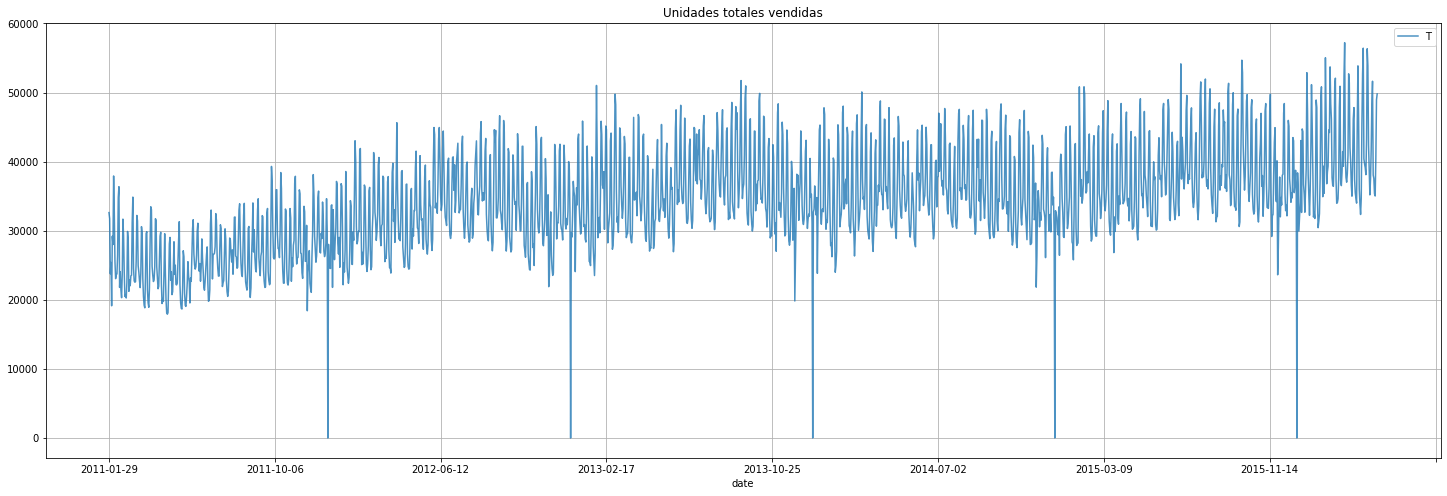

In [17]:
Tot=DF_Tot_unidades_dia['HOBBIES']+DF_Tot_unidades_dia['HOUSEHOLD']+DF_Tot_unidades_dia['FOODS']
Tot.plot(figsize=(25, 8),
          alpha=0.8,
          title='Unidades totales vendidas',
          legend="Total")
    
#plt.legend(DF_Tot_unidades_dia.columns)
plt.legend("Total")
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.1.2 Unidades vendidas Total General - Media Movil (90).

In [18]:
past_sales

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBIES_1_034_CA_1_validation,HOBBIES_1_035_CA_1_validation,HOBBIES_1_036_CA_1_validation,HOBBIES_1_037_CA_1_validation,HOBBIES_1_038_CA_1_validation,HOBBIES_1_039_CA_1_validation,HOBBIES_1_040_CA_1_validation,...,FOODS_3_788_WI_3_validation,FOODS_3_789_WI_3_validation,FOODS_3_790_WI_3_validation,FOODS_3_791_WI_3_validation,FOODS_3_792_WI_3_validation,FOODS_3_793_WI_3_validation,FOODS_3_794_WI_3_validation,FOODS_3_795_WI_3_validation,FOODS_3_796_WI_3_validation,FOODS_3_797_WI_3_validation,FOODS_3_798_WI_3_validation,FOODS_3_799_WI_3_validation,FOODS_3_800_WI_3_validation,FOODS_3_801_WI_3_validation,FOODS_3_802_WI_3_validation,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,...,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,12,6,0,0,0,0,0,0,39,0,0,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,11,1,1,0,0,0,0,0,34,0,0,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,...,0,0,0,0,11,3,1,0,0,0,0,0,42,0,0,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,29,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1,1,1,0,1,0,1,4,0,0,0,0,0,0,0,4,0,0,0,0,0,1,1,0,0,0,0,1,1,7,0,0,0,0,0,0,1,0,0,1,...,2,12,0,2,1,0,0,1,2,1,0,0,6,5,0,0,14,3,0,0,0,0,0,27,0,2,1,0,1,0,4,1,1,0,0,0,0,1,1,0
2016-04-21,3,0,0,1,2,0,0,6,0,0,0,1,0,0,0,0,0,0,11,0,0,1,1,0,2,0,0,1,4,7,0,0,0,0,0,0,1,0,0,0,...,5,7,0,0,0,1,1,2,1,1,0,0,9,1,0,0,6,0,0,1,0,2,2,29,1,0,1,0,0,0,2,3,3,0,2,1,0,0,0,0
2016-04-22,0,0

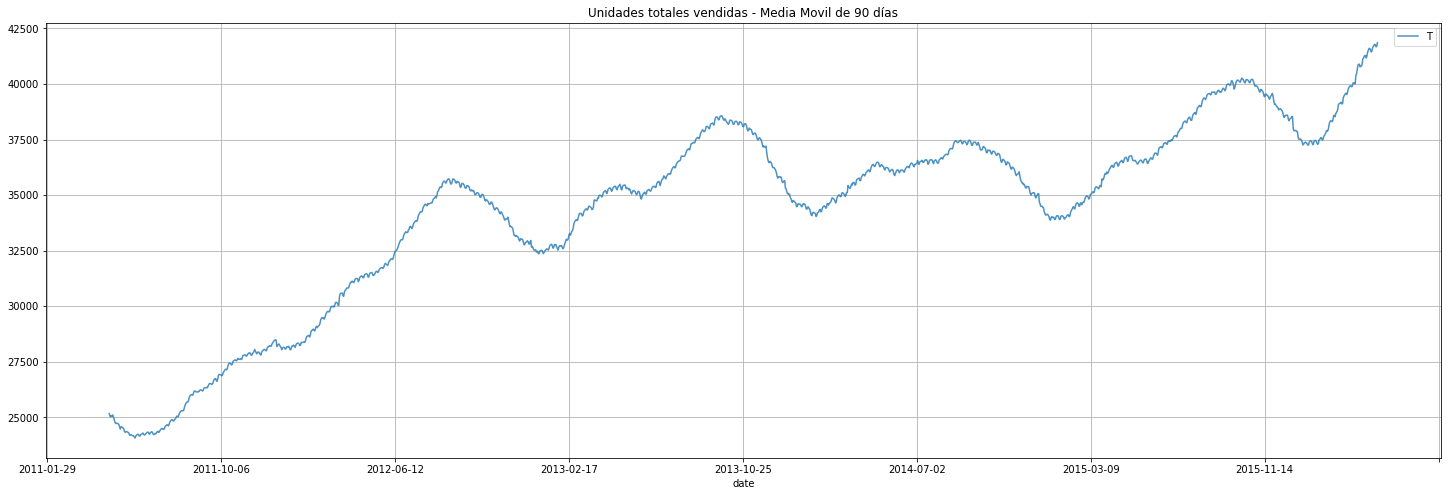

In [19]:

TotMediaMovil90=past_sales.sum(axis=1).rolling(90).mean()

TotMediaMovil90.plot(figsize=(25, 8),
          alpha=0.8,
          title='Unidades totales vendidas - Media Movil de 90 días')
    
plt.legend("Total")
plt.grid(b=True,which='both',axis='both')
plt.show()

## 2.2 EDA Estado.

In [20]:
stv['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [21]:
a = 0

for i in stv['state_id'].unique():
    a = a + 1
    items_cat = [c for c in past_sales.columns if i in c] #imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'past_sales.columns' si cumple que el elemento 'c' contenga la variable i (La cual contiene los nombres FOODS, HOBBIES Y HOUSEHOLD)
    DFActual_cat = past_sales[items_cat].sum(axis=1)
    
    if a == 1:
      DFAcum_cat = DFActual_cat
    if a > 1:
      DFAcum_cat = pd.concat([DFAcum_cat,DFActual_cat], axis=1)
      if a == 2:
        DFAcum_cat = pd.DataFrame({'CA' : DFAcum_cat[0],'TX' : DFAcum_cat[1]})
        
DF_Tot_unidades_dia_cat=pd.DataFrame({'CA' : DFAcum_cat['CA'],'TX' : DFAcum_cat['TX'],'WI' : DFAcum_cat[0]})
DF_Tot_unidades_dia_cat


,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-04-20,15148,9600,10595
2016-04-21,14488,9602,10943
2016-04-22,17095,10615,12807


### 2.2.1 Unidades Vendidas por Estado.

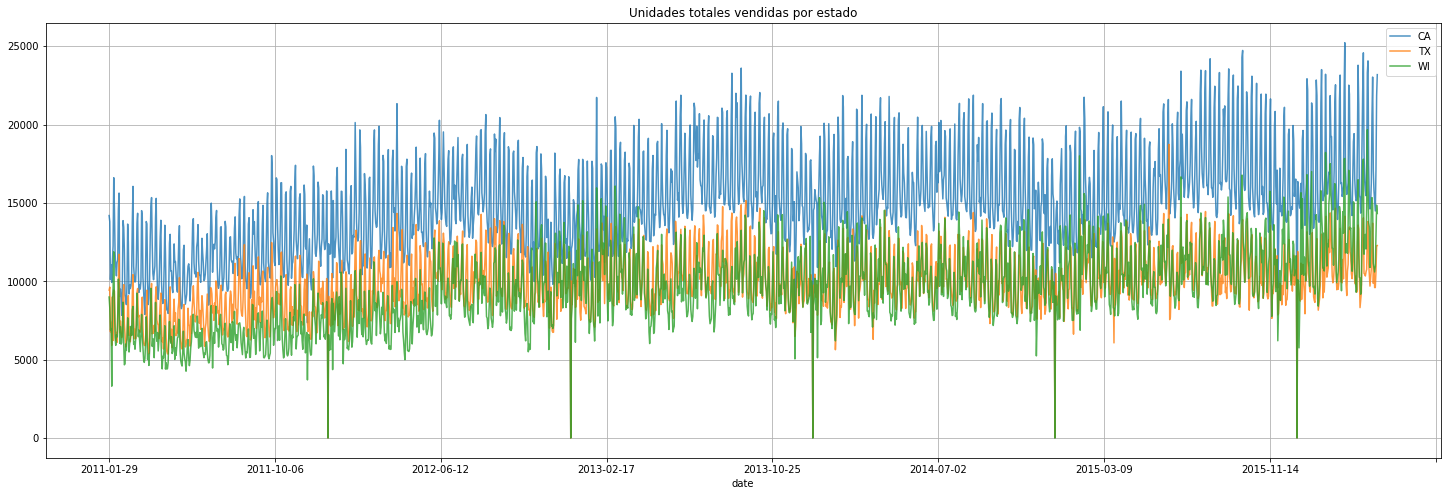

In [22]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for i in DF_Tot_unidades_dia_cat.columns:
  DF_Tot_unidades_dia_cat[i].plot(figsize=(25, 8),
            alpha=0.8,
            title='Unidades totales vendidas por estado')
    
plt.legend(DF_Tot_unidades_dia_cat.columns)
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.2.2 Unidades vendidas por Estado - Media Movil (90).

In [0]:
a = 0
for i in stv['state_id'].unique():
    a += 1
    items_Est = [c for c in past_sales.columns if i in c] #imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'past_sales.columns' si cumple que el elemento 'c' contenga la variable i (La cual contiene los nombres FOODS, HOBBIES Y HOUSEHOLD)
    ListaMedMov90_Est = past_sales[items_Est].sum(axis=1).rolling(90).mean()
    if a == 1:
      DFMedMov90_Est = pd.DataFrame({i : ListaMedMov90_Est})

    DFMedMov90_Est[i]=ListaMedMov90_Est.tolist()

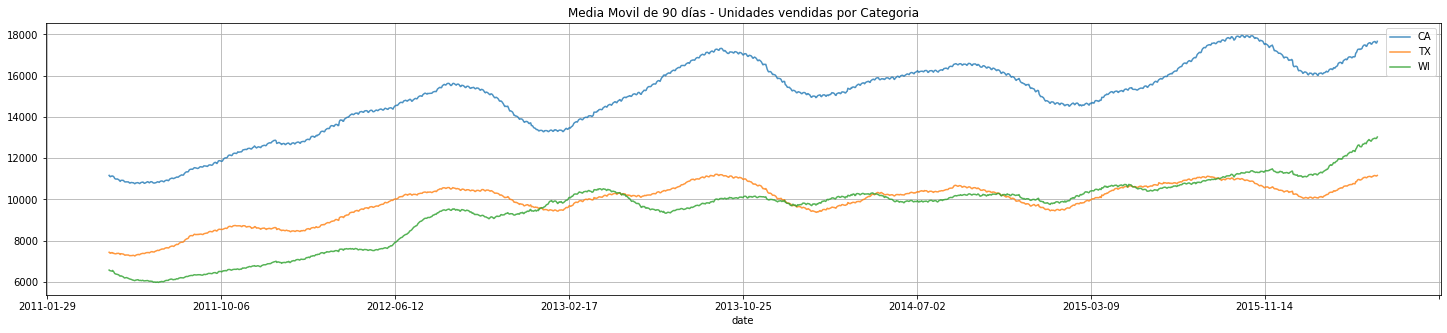

In [24]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for i in stv['state_id'].unique():
  W =  DFMedMov90_Est[i].plot(figsize=(25, 5),
              alpha=0.8,
              title='Media Movil de 90 días - Unidades vendidas por Categoria',
              color=next(color_cycle))
plt.legend(stv['state_id'].unique())
plt.grid(b=True,which='both',axis='both')
plt.show()

## 2.3 EDA Categoria.

### 2.3.1 Cantidad de referencias por Categoria.

In [25]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

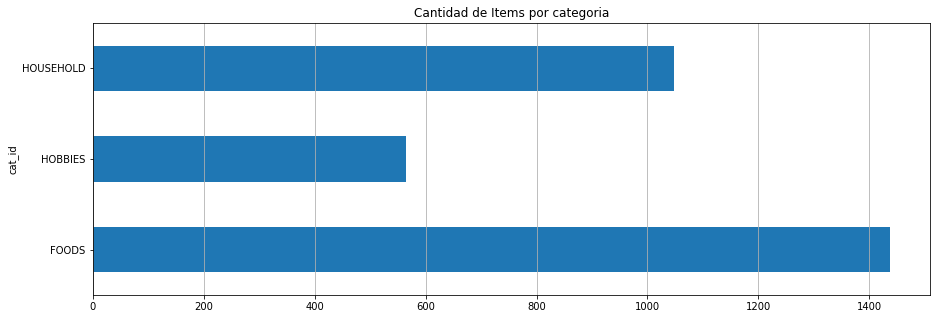

In [26]:
CantRef=stv.groupby('cat_id')['item_id'].count()/10
CantRef.plot(kind='barh', figsize=(15, 5), title='Cantidad de Items por categoria')
plt.grid(b=True,which='both',axis='x')
plt.show()

In [27]:
stv.groupby('cat_id')['item_id'].count()/10

cat_id
FOODS        1437.0
HOBBIES       565.0
HOUSEHOLD    1047.0
Name: item_id, dtype: float64

### 2.3.2 Unidades vendidas por Categoria.

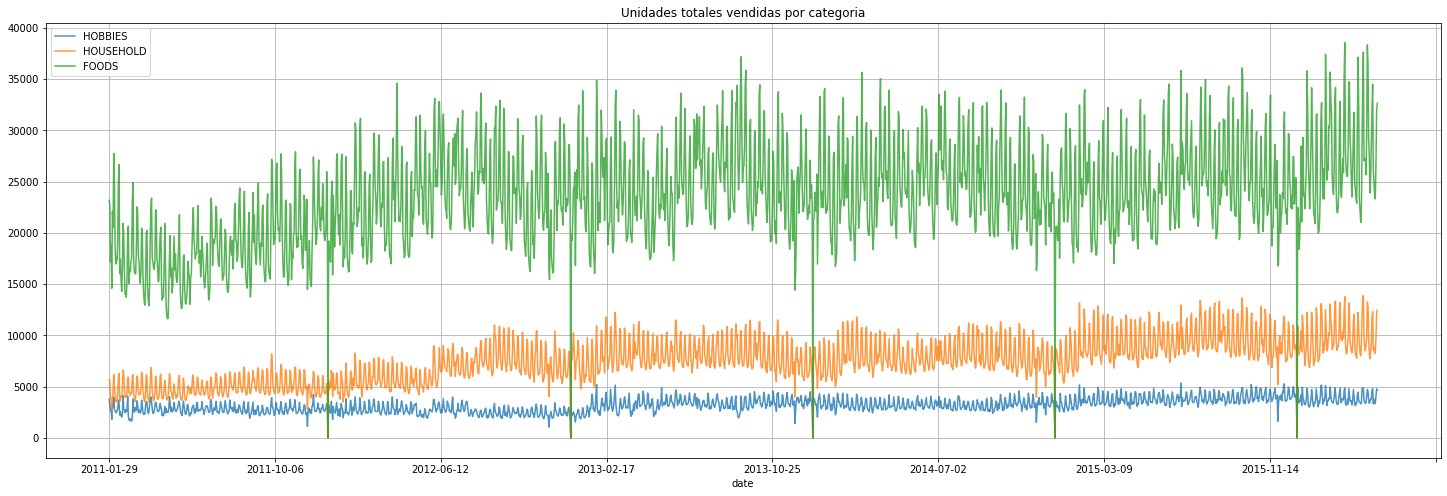

In [28]:
for i in DF_Tot_unidades_dia.columns:
  DF_Tot_unidades_dia[i].plot(figsize=(25, 8),
            alpha=0.8,
            title='Unidades totales vendidas por categoria')
    
plt.legend(DF_Tot_unidades_dia.columns)
plt.grid(b=True,which='both',axis='both')
plt.show()

Como se evidencia graficamente la categoria con mayor variabilidad en las cantidades compradas es la categoria "FOODS".

In [29]:
DF_Tot_unidades_dia

,HOBBIES,HOUSEHOLD,FOODS
date,,,
2011-01-29,3764,5689,23178
2011-01-30,3357,5634,22758
2011-01-31,2682,3927,17174
2011-02-01,2669,3865,18878
2011-02-02,1814,2729,14603
...,...,...,...
2016-04-20,3472,8239,23632
2016-04-21,3353,8363,23317
2016-04-22,4085,9728,26704


In [30]:
DF_Tot_unidades_dia.std()

HOBBIES       706.371092
HOUSEHOLD    2194.630349
FOODS        4908.505905
dtype: float64

La tienda no registra ventas cada 25 de diciembre

In [31]:
DFVentas_Nulas = DF_Tot_unidades_dia[DF_Tot_unidades_dia.HOBBIES.isin([0])]
DFVentas_Nulas

,HOBBIES,HOUSEHOLD,FOODS
date,,,
2011-12-25,0,0,13
2012-12-25,0,0,11
2013-12-25,0,0,20
2014-12-25,0,0,20
2015-12-25,0,1,13


### 2.3.3 Unidades vendidas por Categoria - Media Movil 90.

In [0]:
a = 0
for i in stv['cat_id'].unique():
    a += 1
    items_col = [c for c in past_sales.columns if i in c] #imprima el elemento 'c' para cada elemento 'c' en la colección de columnas 'past_sales.columns' si cumple que el elemento 'c' contenga la variable i (La cual contiene los nombres FOODS, HOBBIES Y HOUSEHOLD)
    ListaMedMov90 = past_sales[items_col].sum(axis=1).rolling(90).mean()
    if a == 1:
      DFMedMov90 = pd.DataFrame({i : ListaMedMov90})

    DFMedMov90[i]=ListaMedMov90.tolist()


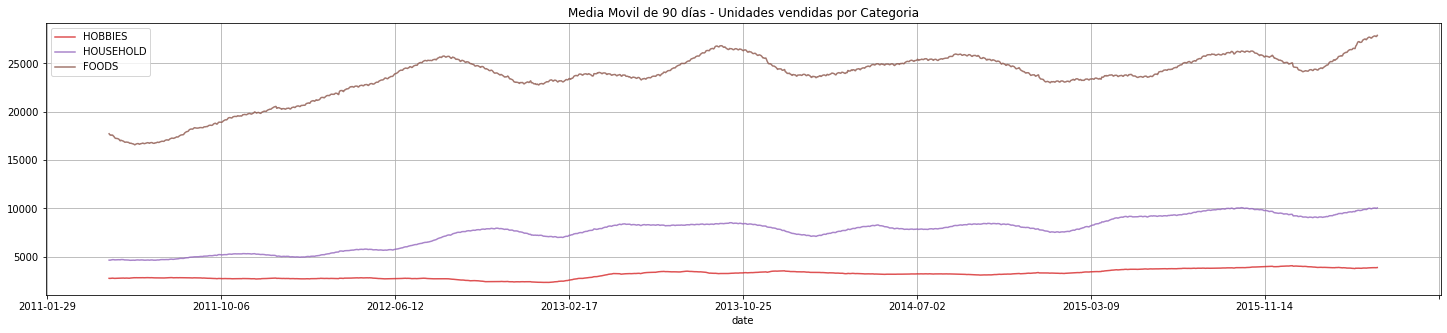

In [33]:
for i in stv['cat_id'].unique():
  W = DFMedMov90[i].plot(figsize=(25, 5),
              alpha=0.8,
              title='Media Movil de 90 días - Unidades vendidas por Categoria',
              color=next(color_cycle))
plt.legend(stv['cat_id'].unique())
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.3.4 Boxplot por Categoria.

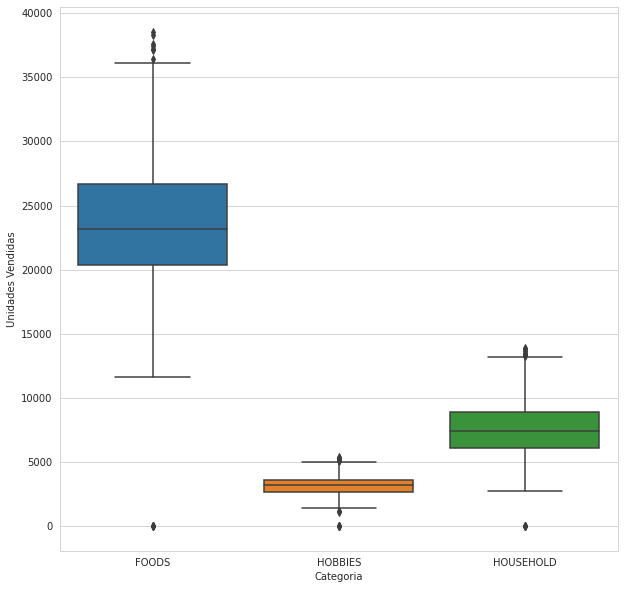

In [34]:
cat_sum = stv.groupby(['cat_id']).sum().T.reset_index(drop = True)

ListF1=cat_sum['FOODS'].tolist()
ListF2= ['FOODS']*1913
ListH1=cat_sum['HOBBIES'].tolist()
ListH2= ['HOBBIES']*1913
ListHouse1=cat_sum['HOUSEHOLD'].tolist()
ListHouse2= ['HOUSEHOLD']*1913

ListF1.extend(ListH1)
ListF1.extend(ListHouse1)

ListF2.extend(ListH2)
ListF2.extend(ListHouse2)

plt.figure(figsize=(10,10))
DFBoxplot = pd.DataFrame({'Categoria' : pd.Series(ListF2),'Unidades Vendidas' : pd.Series(ListF1)})
DFBoxplot
sns.set_style("whitegrid")
sns.boxplot(data=DFBoxplot,x='Categoria',y='Unidades Vendidas')


### 2.3.5 Cantidad de unidades vendidas por Categoria - Dia/Mes/Año.

In [0]:
cal_mod = pd.DataFrame(cal)
cal_mod.drop(cal_mod.tail(56).index,inplace=True)#DF al que se le quitaran 56 filas debido a que Sales_train_validation viene con 56 días menos (Esos 56 registros faltantes se brindaran posteriormente para evaluar la prueba)
#cal_mod

In [0]:
DF_Tot_unidades_dia2=DF_Tot_unidades_dia.reset_index().rename(columns={'index': 'date'})
#DF_Tot_unidades_dia2

In [37]:
DF_Tot_unidades_dia2_UNIDO_cal = DF_Tot_unidades_dia2.merge(cal_mod, how='left', validate='1:1')
DF_Tot_unidades_dia2_UNIDO_cal

,date,HOBBIES,HOUSEHOLD,FOODS,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,3764,5689,23178,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,3357,5634,22758,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,2682,3927,17174,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,2669,3865,18878,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,1814,2729,14603,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,3472,8239,23632,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0
1909,2016-04-21,3353,8363,23317,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,2016-04-22,4085,9728,26704,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,2016-04-23,4787,12248,31927,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0


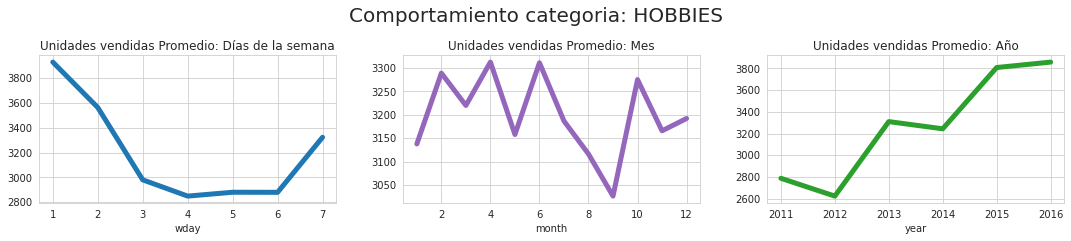

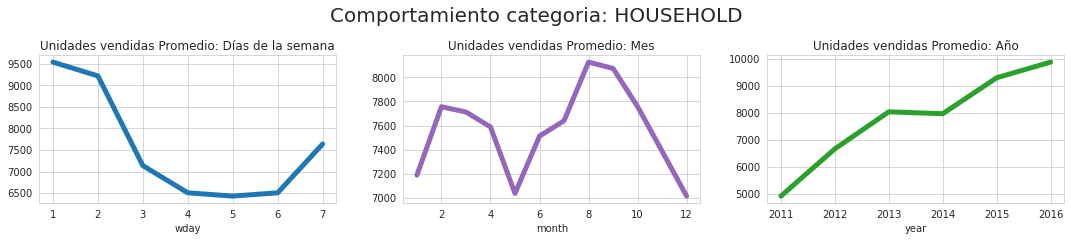

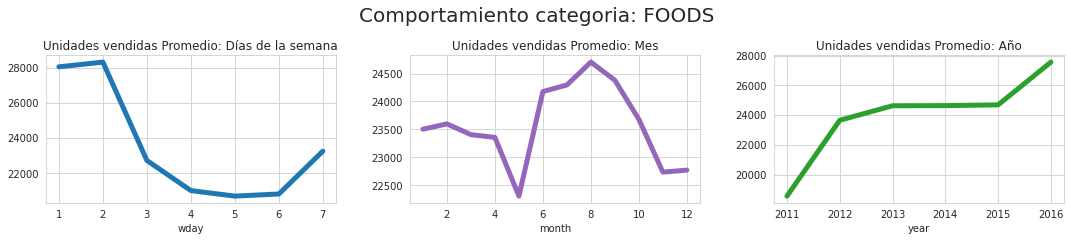

In [38]:
for i in DF_Tot_unidades_dia.columns:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
  
  DF_Tot_unidades_dia2_UNIDO_cal.groupby('wday').mean()[i].plot(kind='line', \
            title='Unidades vendidas Promedio: Días de la semana',
            lw=5,
            color=color_pal[0],
            ax=ax1,
            grid=True)
  
  DF_Tot_unidades_dia2_UNIDO_cal.groupby('month').mean()[i].plot(kind='line',
            title='Unidades vendidas Promedio: Mes',
            lw=5,
            color=color_pal[4],
            ax=ax2,
            grid=True)
  DF_Tot_unidades_dia2_UNIDO_cal.groupby('year').mean()[i].plot(kind='line',
            lw=5,
            title='Unidades vendidas Promedio: Año',
            color=color_pal[2],
            ax=ax3,
            grid=True)
  fig.suptitle(f'Comportamiento categoria: {i}',
                size=20,
                y=1.1)
  plt.tight_layout()
  plt.show()

In [39]:
DF_Tot_unidades_dia2_UNIDO_cal.groupby('wday').mean()['HOBBIES']

wday
1    3930.332117
2    3564.182482
3    2980.336996
4    2849.161172
5    2880.256410
6    2879.615385
7    3323.827839
Name: HOBBIES, dtype: float64

### 2.3.6 Mapa de calor comportamiento Anual.

In [0]:
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

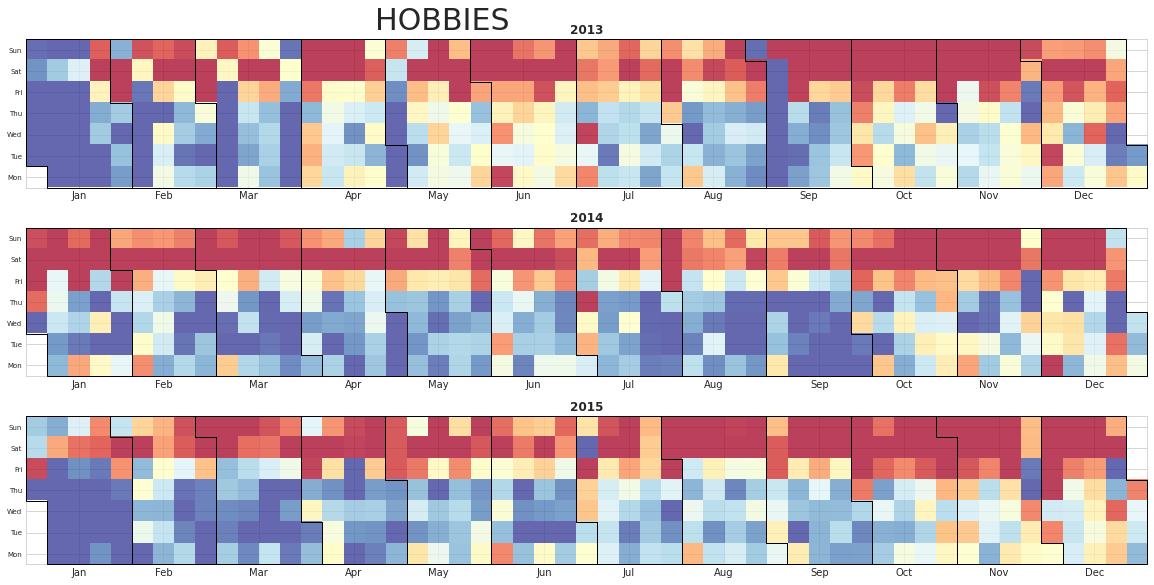

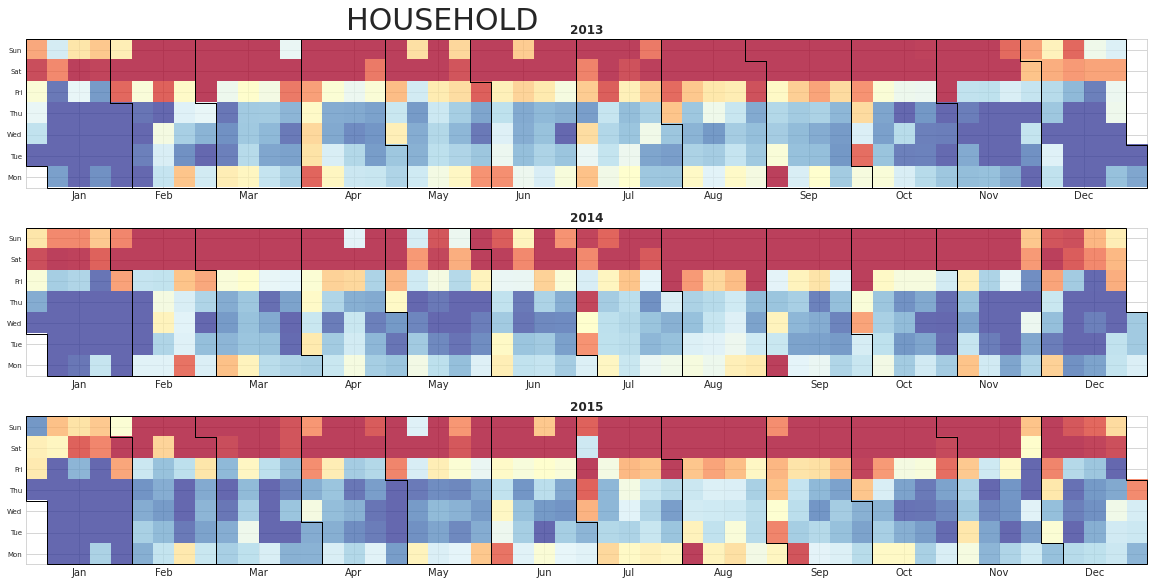

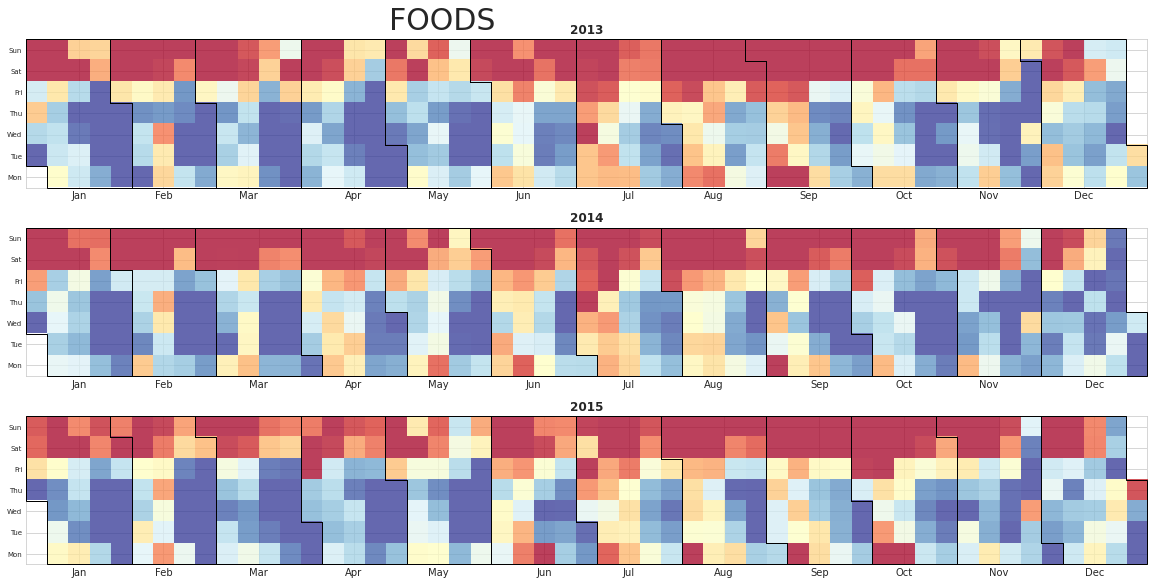

In [41]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in stv['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()


### 2.3.7 Histograma precios promedio por categoria.

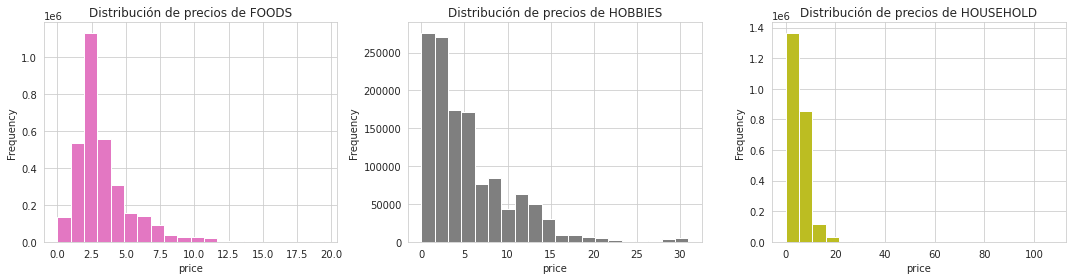

In [42]:
sp['Category'] = sp['item_id'].str.split('_', expand=True)[0] # Lista con la categoria de cada registro (a partir de Dataset de precios --> sp)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
i = 0
for cat, d in sp.groupby('Category'):
    ax = d['sell_price'] \
        .plot(kind='hist',
                         bins=20,
                         title=f'Distribución de precios de {cat}',
                         ax=axs[i],
                                         color=next(color_cycle))
    ax.set_xlabel('price')
    i += 1
plt.tight_layout()

## 2.4 EDA Departamento.

In [43]:
past_sales

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBIES_1_034_CA_1_validation,HOBBIES_1_035_CA_1_validation,HOBBIES_1_036_CA_1_validation,HOBBIES_1_037_CA_1_validation,HOBBIES_1_038_CA_1_validation,HOBBIES_1_039_CA_1_validation,HOBBIES_1_040_CA_1_validation,...,FOODS_3_788_WI_3_validation,FOODS_3_789_WI_3_validation,FOODS_3_790_WI_3_validation,FOODS_3_791_WI_3_validation,FOODS_3_792_WI_3_validation,FOODS_3_793_WI_3_validation,FOODS_3_794_WI_3_validation,FOODS_3_795_WI_3_validation,FOODS_3_796_WI_3_validation,FOODS_3_797_WI_3_validation,FOODS_3_798_WI_3_validation,FOODS_3_799_WI_3_validation,FOODS_3_800_WI_3_validation,FOODS_3_801_WI_3_validation,FOODS_3_802_WI_3_validation,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,...,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,12,6,0,0,0,0,0,0,39,0,0,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,11,1,1,0,0,0,0,0,34,0,0,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,...,0,0,0,0,11,3,1,0,0,0,0,0,42,0,0,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,29,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1,1,1,0,1,0,1,4,0,0,0,0,0,0,0,4,0,0,0,0,0,1,1,0,0,0,0,1,1,7,0,0,0,0,0,0,1,0,0,1,...,2,12,0,2,1,0,0,1,2,1,0,0,6,5,0,0,14,3,0,0,0,0,0,27,0,2,1,0,1,0,4,1,1,0,0,0,0,1,1,0
2016-04-21,3,0,0,1,2,0,0,6,0,0,0,1,0,0,0,0,0,0,11,0,0,1,1,0,2,0,0,1,4,7,0,0,0,0,0,0,1,0,0,0,...,5,7,0,0,0,1,1,2,1,1,0,0,9,1,0,0,6,0,0,1,0,2,2,29,1,0,1,0,0,0,2,3,3,0,2,1,0,0,0,0
2016-04-22,0,0

In [44]:
Dep_list = stv['dept_id'].unique()
Dep_list

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [45]:
Dep_list = stv['dept_id'].unique()
Dep_list
a = 0
for s in Dep_list:
  a += 1
  Dep_items = [c for c in past_sales.columns if s in c]
  List_Dep=past_sales[Dep_items].sum(axis=1).rolling(1).mean()
  if a == 1:
    DFAcumul_Dep=pd.DataFrame({s : List_Dep})
    
  DFAcumul_Dep[s] = List_Dep
DFAcumul_Dep

,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,FOODS_1,FOODS_2,FOODS_3
date,,,,,,,
2011-01-29,3610.0,154.0,4105.0,1584.0,2343.0,4094.0,16741.0
2011-01-30,3172.0,185.0,3858.0,1776.0,2216.0,4209.0,16333.0
2011-01-31,2497.0,185.0,2827.0,1100.0,1657.0,3174.0,12343.0
2011-02-01,2531.0,138.0,2732.0,1133.0,1508.0,3606.0,13764.0
2011-02-02,1714.0,100.0,1802.0,927.0,1209.0,2869.0,10525.0
...,...,...,...,...,...,...,...
2016-04-20,3141.0,331.0,6393.0,1846.0,2657.0,4734.0,16241.0
2016-04-21,3014.0,339.0,6580.0,1783.0,2639.0,4446.0,16232.0
2016-04-22,3678.0,407.0,7762.0,1966.0,3169.0,4974.0,18561.0


### 2.4.1 Unidades vendidas por departamento.

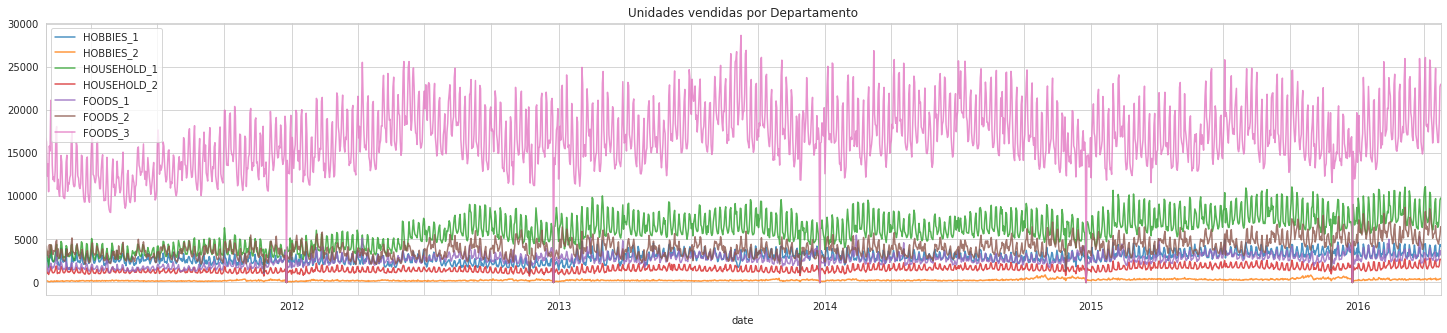

In [46]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for s in Dep_list:
  T = DFAcumul_Dep[s].plot(figsize=(25, 5),
              alpha=0.8,
              title='Unidades vendidas por Departamento',
              color=next(color_cycle))
plt.legend(Dep_list)
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.4.2 Unidades vendidas por departamentos de HOBBIES.

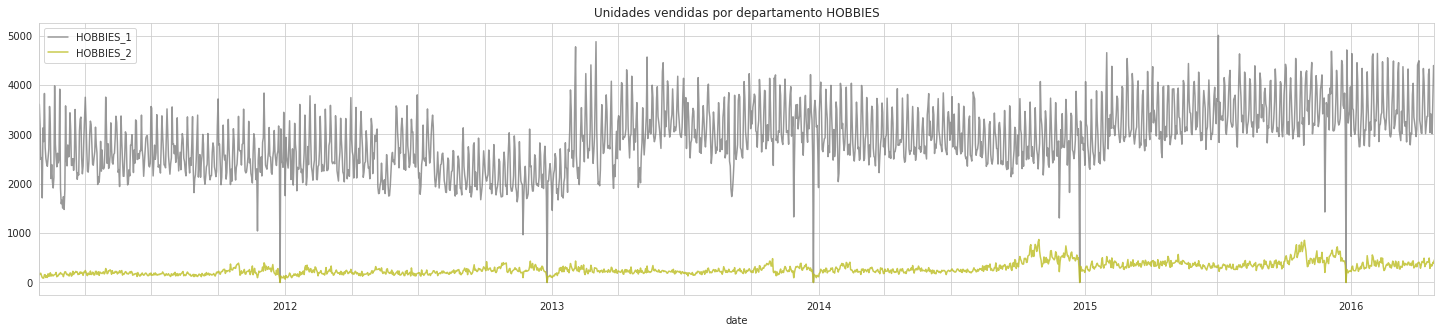

In [47]:
Hob = DFAcumul_Dep['HOBBIES_1'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento HOBBIES',
            color=next(color_cycle))
Hob = DFAcumul_Dep['HOBBIES_2'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento HOBBIES',
            color=next(color_cycle))
plt.legend(['HOBBIES_1','HOBBIES_2'])
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.4.3 Unidades vendidas por departamentos de HOUSEHOLD.

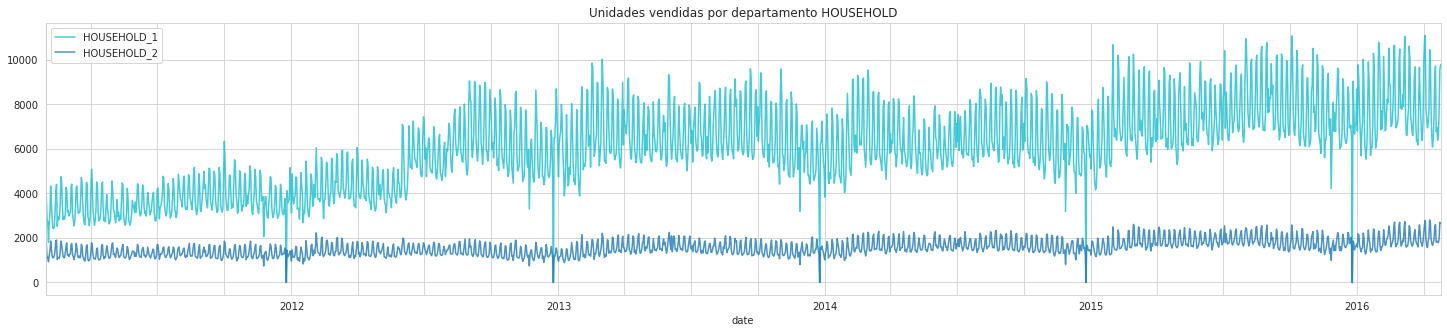

In [48]:
Hou = DFAcumul_Dep['HOUSEHOLD_1'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento HOUSEHOLD',
            color=next(color_cycle))
Hou = DFAcumul_Dep['HOUSEHOLD_2'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento HOUSEHOLD',
            color=next(color_cycle))
plt.legend(['HOUSEHOLD_1','HOUSEHOLD_2'])
plt.grid(b=True,which='both',axis='both')
plt.show()

### 2.4.3 Unidades vendidas por departamentos de FOODS.

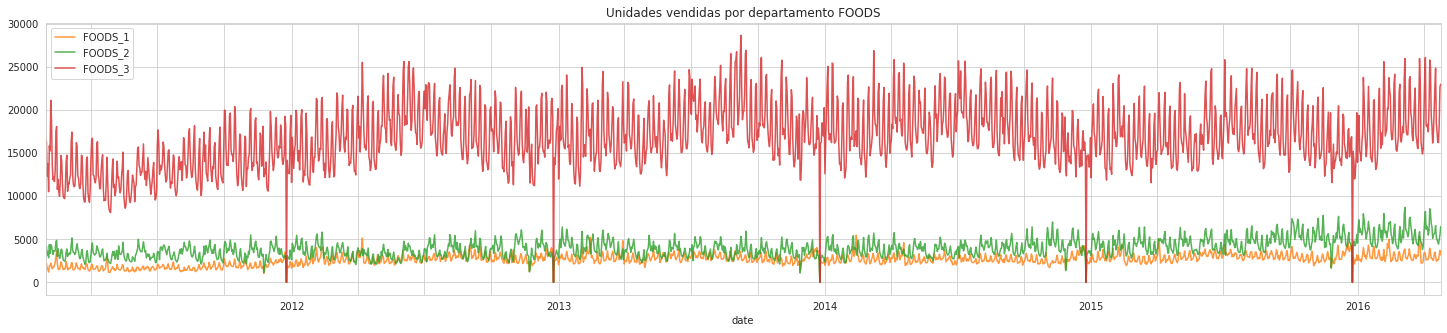

In [49]:
Foo = DFAcumul_Dep['FOODS_1'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento FOODS',
            color=next(color_cycle))
Foo = DFAcumul_Dep['FOODS_2'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento FOODS',
            color=next(color_cycle))
Foo = DFAcumul_Dep['FOODS_3'].plot(figsize=(25, 5),
            alpha=0.8,
            title='Unidades vendidas por departamento FOODS',
            color=next(color_cycle))
plt.legend(['FOODS_1','FOODS_2','FOODS_3'])
plt.grid(b=True,which='both',axis='both')
plt.show()

## 2.5 EDA Tienda.

### 2.5.1 Media movil en ventas por tienda.

In [50]:
store_list = sp['store_id'].unique()
store_list
a = 0
for s in store_list:
  a += 1
  store_items = [c for c in past_sales.columns if s in c]
  List_Act=past_sales[store_items].sum(axis=1).rolling(90).mean()
  if a == 1:
    DFAcumul=pd.DataFrame({s : List_Act})
    
  DFAcumul[s] = List_Act.tolist()
DFAcumul

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,4440.522222,4250.066667,6401.200000,2567.300000,3247.111111,4067.766667,3842.344444,3794.444444,5241.244444,3929.600000
2016-04-21,4441.600000,4244.688889,6398.911111,2567.066667,3245.866667,4066.033333,3839.433333,3791.944444,5243.988889,3927.911111
2016-04-22,4424.533333,4228.022222,6373.833333,2562.011111,3241.633333,4059.977778,3836.155556,3783.222222,5243.422222,3921.188889


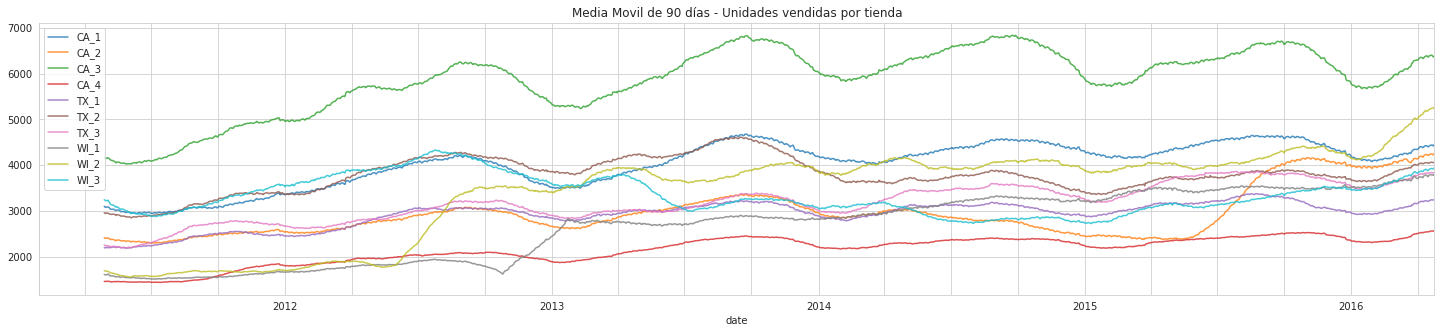

In [51]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for s in store_list:
  T = DFAcumul[s].plot(figsize=(25, 5),
              alpha=0.8,
              title='Media Movil de 90 días - Unidades vendidas por tienda',
              color=next(color_cycle))
plt.legend(store_list)
plt.grid(b=True,which='both',axis='both')
plt.show()

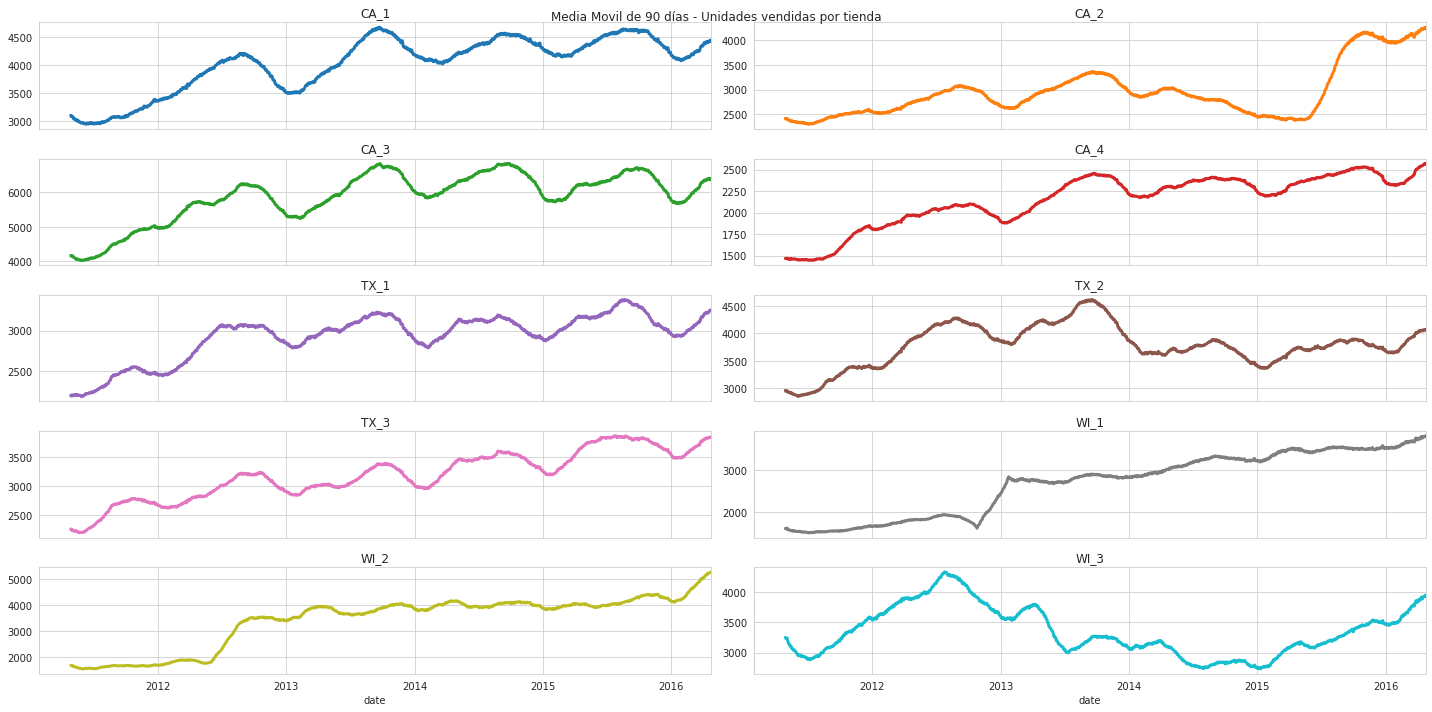

In [52]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(5, 2, figsize=(20, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
  DFAcumul[s].plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle),
              grid=True)
  ax_idx += 1

plt.suptitle('Media Movil de 90 días - Unidades vendidas por tienda')
plt.tight_layout()
plt.show()